In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def response_time(test):
    path = "/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Reaction Time/"

    counter = 0
    last_value = 0
    index = 0
    
    df = pd.read_csv(path+str(test),low_memory=False)

    df = df.iloc[:, [0,8]]
    current = df.iloc[: ,1]
    start = df.iloc[:70, :]  #get first 70 values 
    
    start_val = start.iloc[:, 1].mean()
    std_val = start.iloc[:, 1].std()

    # print(start_val)
    # print(std_val)
    
    for row in range(0, len(current)):
        if counter < 4:
            # print(counter)
            # print(index)
            if current[row] >= last_value: 
                counter += 1
                last_value = current[row]
            else: 
                counter = 0
                last_value = current[row]
        else:
            start_point = row
            print(start_point)
            break

    # rise = current.iloc[start_point:]
    # print(rise.head())


In [5]:
test = "30V1.csv"
response_time(test)

142


In [499]:
def rise_time(test):
    path = "/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Reaction Time/"

    counter = 0
    last_value = 0
    index = 0
    
    df = pd.read_csv(path+str(test),low_memory=False)

    df = df.iloc[:, [0,8]] #get time and current 
    current = df.iloc[: ,1]  #just get the current 

    start = current.iloc[:70]  #first 70 values 
    end = current.iloc[-70:]  #last 70 values 
    start_val = start.mean()  #mean start
    end_val = end.mean()    #mean poinnt 
    # print(start_val)
    # print(end_val)

    diff = end_val - start_val  #difference between them 
    
    upper_bound = diff*0.9 
    # print(upper_bound)
    lower_bound = diff*0.1
    # print(lower_bound)

    start_look = start_val + lower_bound  #starting point 
    end_look = start_val + upper_bound   #upper point 

    average = current.rolling(window=10).mean() #rolling average 

    above = average[average>start_look]  #when average is above 
    below = average[average>end_look]  

    x_start = above.first_valid_index()
    x_end = below.first_valid_index()

    samples = x_end - x_start

    time = samples/100

    return(time)
    




Average Activation Time

In [500]:
file_list = ["30V1.csv", "30V2.csv", "30V3.csv", "30V4.csv", "30V5.csv", "30V6.csv", "30V7.csv", "30V8.csv", "30V9.csv", "30V10.csv" ]

results = []

for i in range(0, len(file_list)):
    results.append(rise_time(file_list[i]))

average_time = sum(results)/len(results)
print(average_time)


0.875


In [ ]:
def reaction(test):
    path = "/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Reaction Time/"

    counter = 0
    last_value = 0
    index = 0
    
    df = pd.read_csv(path+str(test),low_memory=False)

    df = df.iloc[:, [0,8]] #get time and current 
    current = df.iloc[: ,1]  #just get the current 

    start = current.iloc[:50]  #first 70 values 
    end = current.iloc[-50:]  #last 70 values 
    start_val = start.mean()  #mean start
    start_std = start.std()
    end_val = end.mean()    #mean poinnt 
    # print(start_val)
    # print(end_val)

    diff = end_val - start_val  #difference between them 
    
    upper_bound = diff*0.3
    # print(upper_bound)
    # lower_bound = start_val+(1*start_std)
    # print(lower_bound)

    start_look = start_val+ upper_bound  #starting point 
    end_look = start_val + upper_bound   #upper point 
    
    plt.rcParams.update({'font.size': 20})
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'CMU Serif, Times New Roman'
    plt.rcParams["mathtext.fontset"] = "dejavuserif"

    average = current.rolling(window=15).mean() #rolling average 
    
    plot = average.plot(figsize=(25,5), linewidth=3.0)
    plot.set_xlabel("time (10ms)")
    plot.set_ylabel("Current Feedback")
    plot.set_title("EMRC Activation Test")


    above = average[average>start_look]  #when average is above 
    below = average[average>end_look]  

    x_start = above.first_valid_index()
    print(x_start) 
    x_end = below.first_valid_index()
    print(x_end)

    samples = x_end - x_start

    time = samples/100

    return(time)

88
98
164
171
202
207
112
121
181
182
165
172
133
140
175
178
222
222
178
176
0.04700000000000001


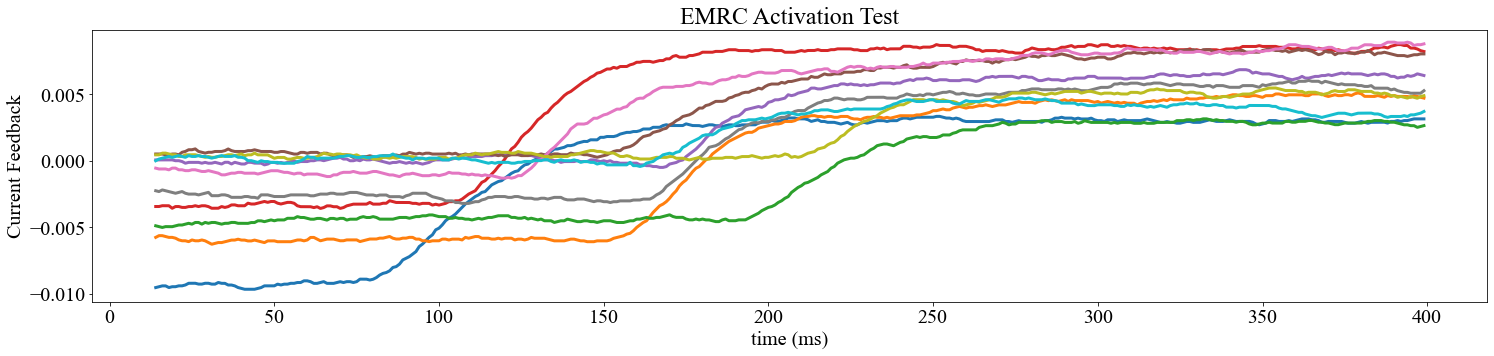

In [ ]:
file_list = ["30V1.csv", "30V2.csv", "30V3.csv", "30V4.csv", "30V5.csv", "30V6.csv", "30V7.csv", "30V8.csv", "30V9.csv", "30V10.csv" ]
# file_list = ["30V7.csv"]

results = []

for i in range(0, len(file_list)):
    results.append(reaction(file_list[i]))

average_time = sum(results)/len(results)
print(average_time)
